In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


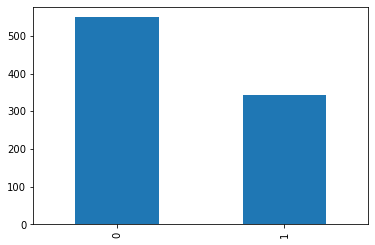

In [3]:
df['Survived'].value_counts().plot(kind='bar')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].mode()

0    24.0
dtype: float64

In [7]:
df['Age']=df['Age'].fillna(24)

In [8]:
Cabin1 = df['Cabin'].astype(str)
cabin2 = np.array([cabin[0] for cabin in Cabin1])
cabin2 = pd.DataFrame(cabin2)
cabin2.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
dtype: int64

In [9]:
df['Embarked'].mode()

0    S
dtype: object

In [10]:
df['Embarked']=df['Embarked'].fillna('S')

In [11]:
df = df.drop('Cabin',axis=1)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
df = df.drop(['Name','PassengerId','Ticket'],axis=1)

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [17]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [18]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

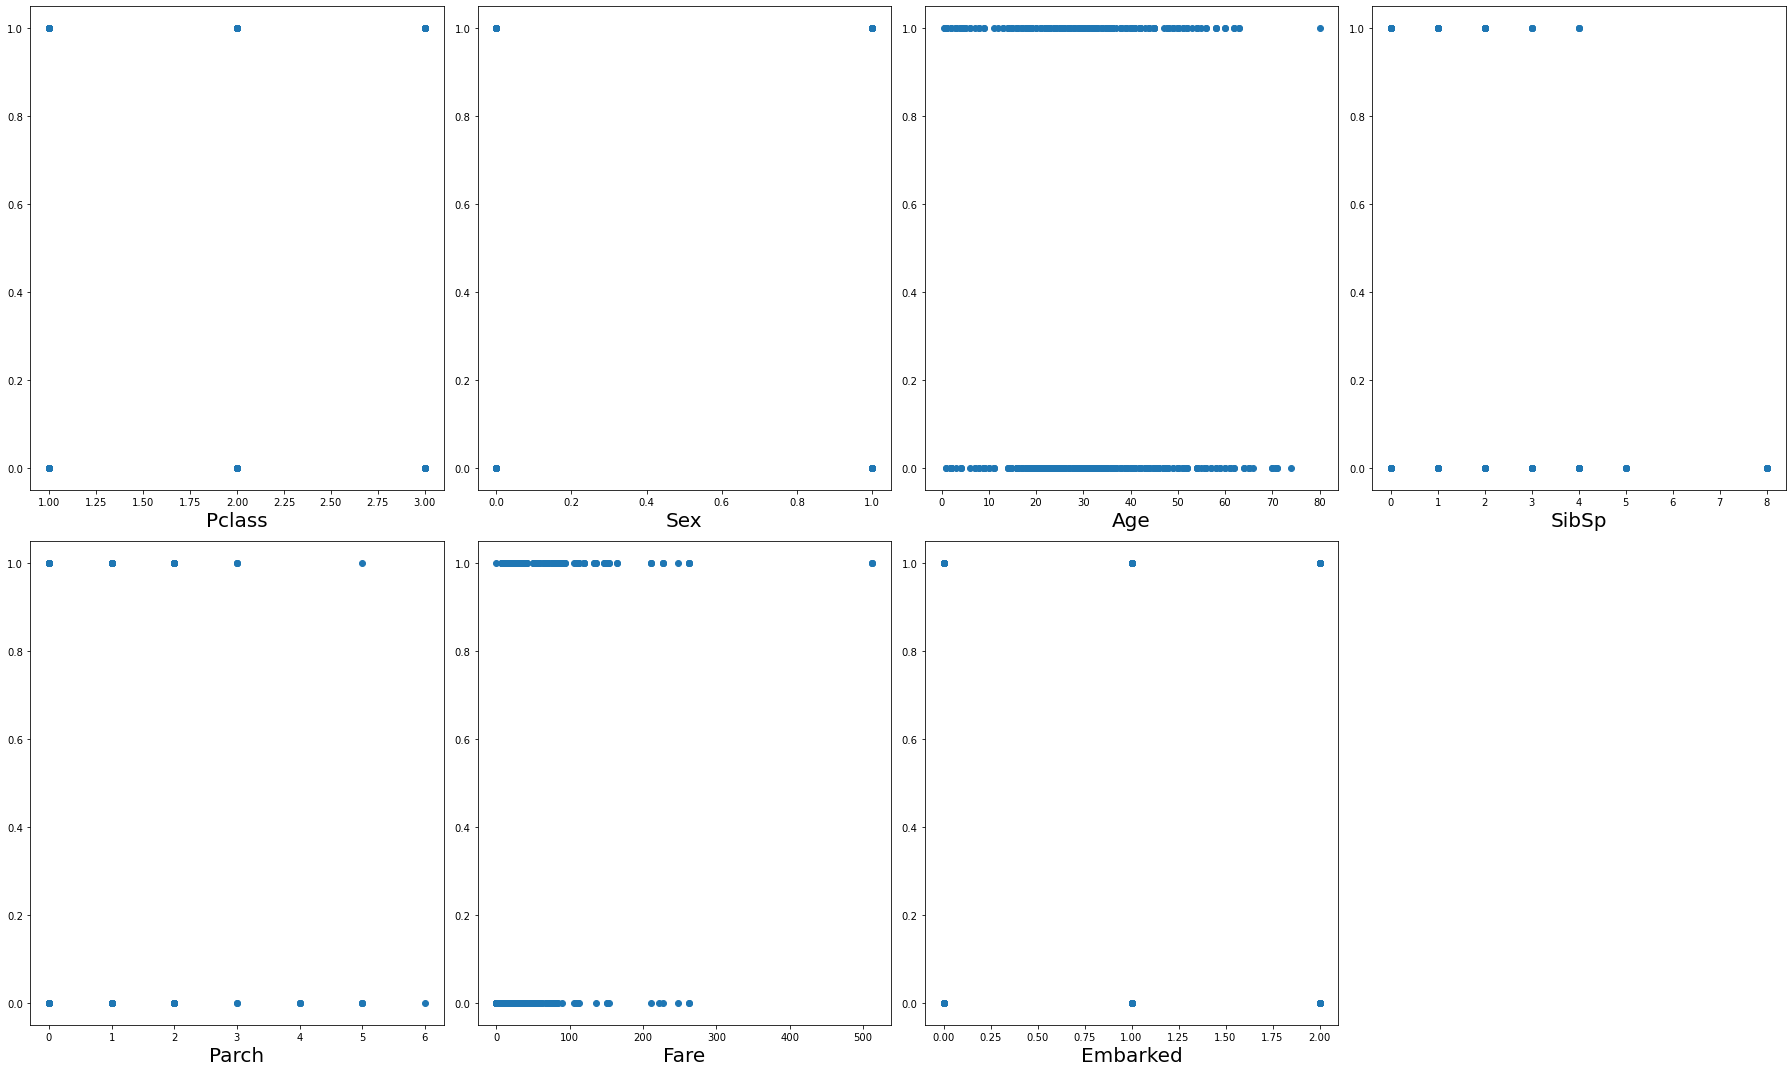

In [19]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

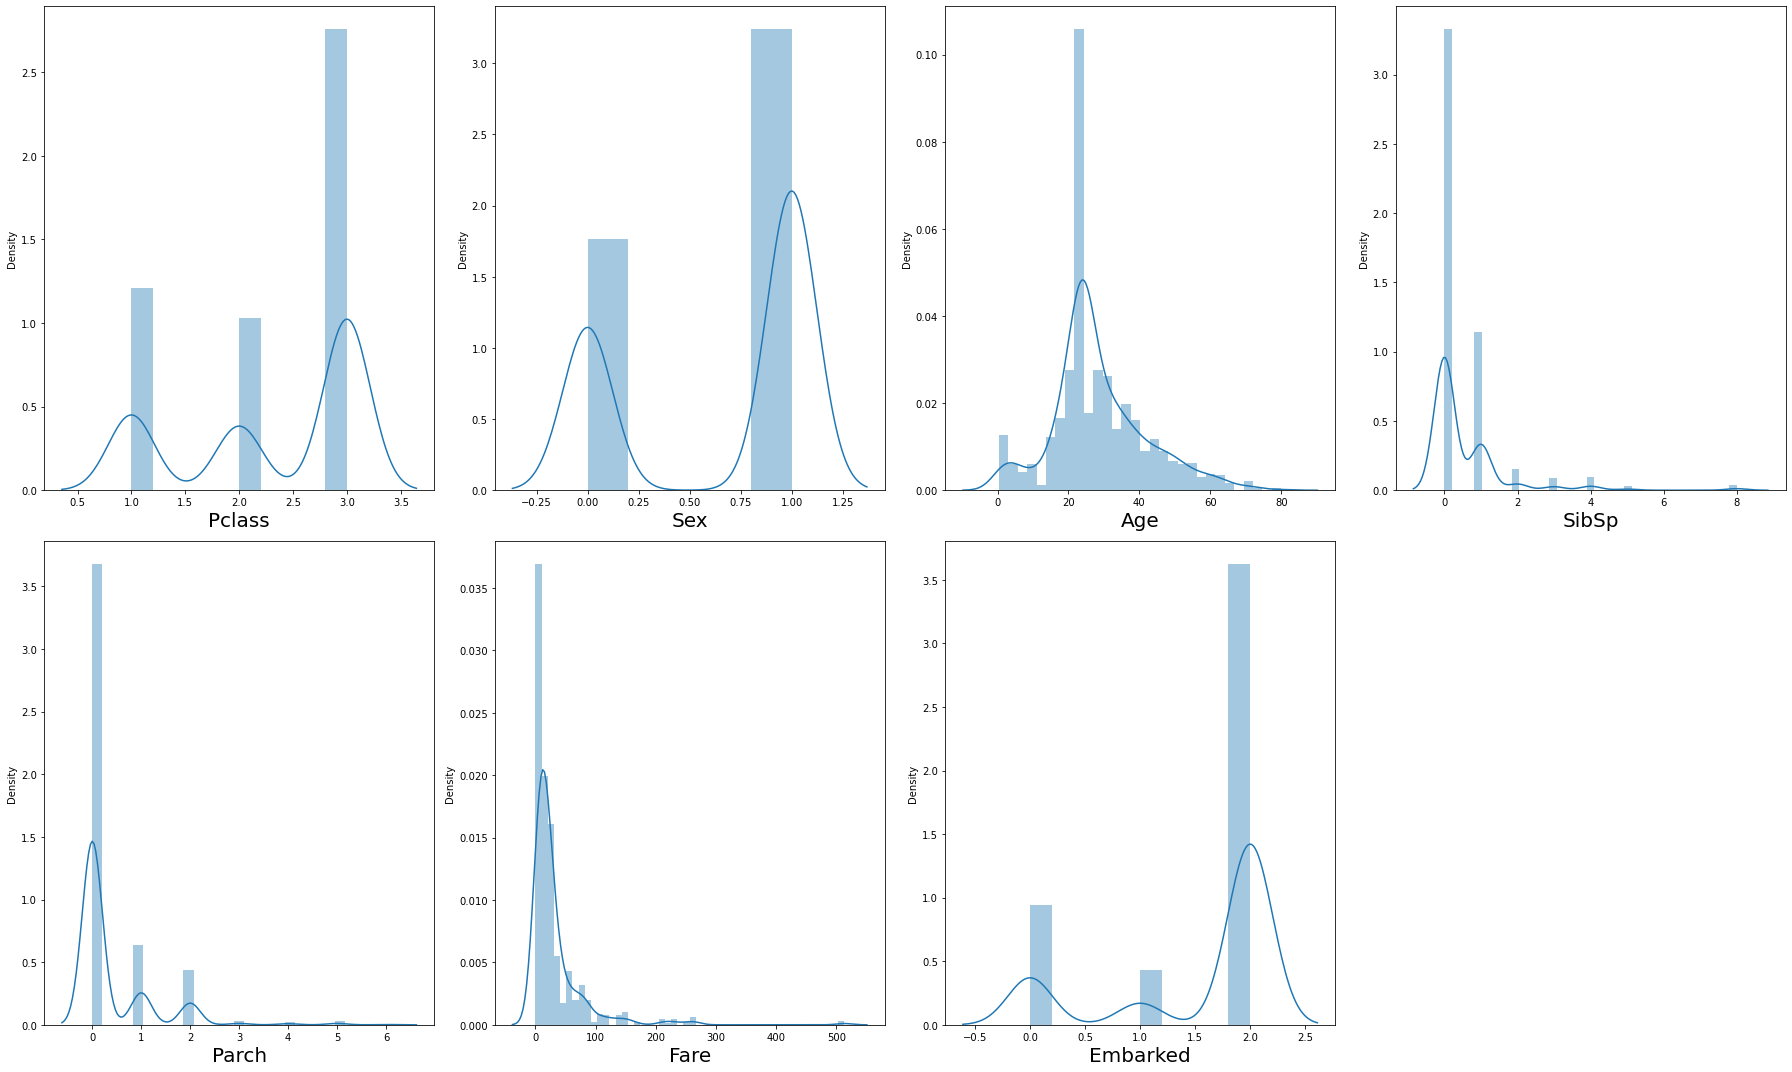

In [20]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

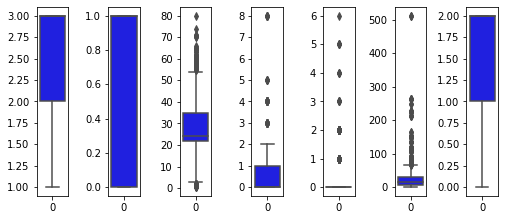

In [21]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

In [22]:
df.drop('Survived',axis=1).corrwith(df.Survived)

Pclass     -0.338481
Sex        -0.543351
Age        -0.052872
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.167675
dtype: float64

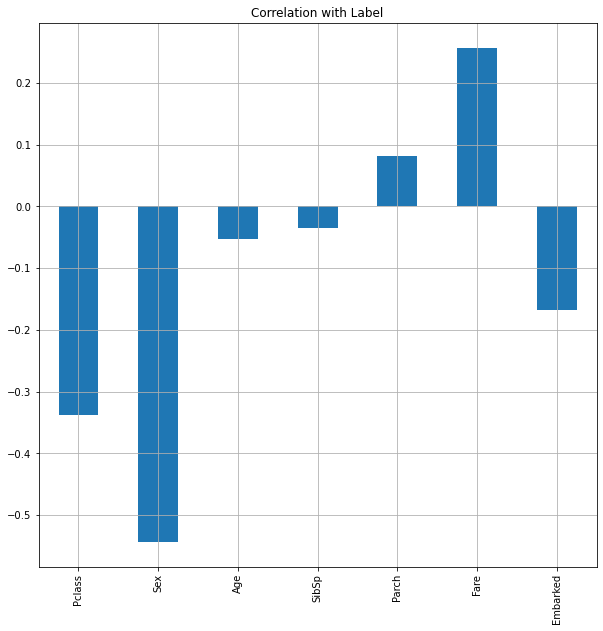

In [23]:
df.drop('Survived',axis=1).corrwith(df.Survived).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

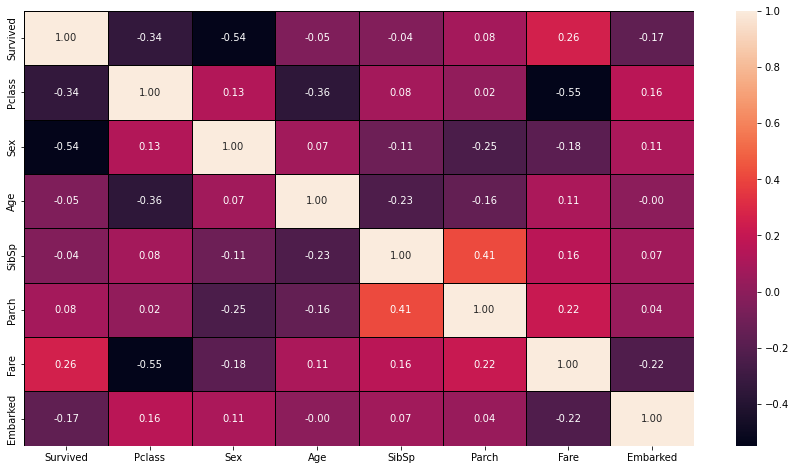

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [25]:
df = df.drop(['Age','SibSp','Parch'],axis=1)

In [26]:
df

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1.0,7.2500,2.0
1,1,1,0.0,71.2833,0.0
2,1,3,0.0,7.9250,2.0
3,1,1,0.0,53.1000,2.0
4,0,3,1.0,8.0500,2.0
...,...,...,...,...,...
886,0,2,1.0,13.0000,2.0
887,1,1,0.0,30.0000,2.0
888,0,3,0.0,23.4500,2.0
889,1,1,1.0,30.0000,0.0


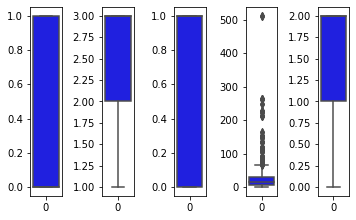

In [27]:
a = df.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = df[a[i]],color='blue',orient='v')
    plt.tight_layout()

In [28]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [29]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)


# LogisticsRegression

In [30]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7668161434977578 Random_state 1
max_accuracy 0.7668161434977578 max_Random_state 1
accuracy 0.7668161434977578 Random_state 2
accuracy 0.7533632286995515 Random_state 3
accuracy 0.7982062780269058 Random_state 4
max_accuracy 0.7982062780269058 max_Random_state 4
accuracy 0.8071748878923767 Random_state 5
max_accuracy 0.8071748878923767 max_Random_state 5
accuracy 0.8071748878923767 Random_state 6
accuracy 0.7309417040358744 Random_state 7
accuracy 0.7623318385650224 Random_state 8
accuracy 0.7488789237668162 Random_state 9
accuracy 0.8251121076233184 Random_state 10
max_accuracy 0.8251121076233184 max_Random_state 10
accuracy 0.8430493273542601 Random_state 11
max_accuracy 0.8430493273542601 max_Random_state 11
accuracy 0.7757847533632287 Random_state 12
accuracy 0.7982062780269058 Random_state 13
accuracy 0.7892376681614349 Random_state 14
accuracy 0.7713004484304933 Random_state 15
accuracy 0.7488789237668162 Random_state 16
accuracy 0.7668161434977578 Random_state 17
accu

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 11)

In [32]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.8430493273542601
[[127  20]
 [ 15  61]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       147
           1       0.75      0.80      0.78        76

    accuracy                           0.84       223
   macro avg       0.82      0.83      0.83       223
weighted avg       0.85      0.84      0.84       223



In [33]:
scr_log = cross_val_score(log,X_scale,y,cv=5)
print('Cross Validation Score for LogisticsRegression ', scr_log.mean())
print('\n')

Cross Validation Score for LogisticsRegression  0.7755508128805474




# RandomForestClassifier

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 11)

In [35]:
rand = RandomForestClassifier()
rand.fit(x_train,y_train)
y_pred=rand.predict(x_test)
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.7982062780269058
[[128  19]
 [ 26  50]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       147
           1       0.72      0.66      0.69        76

    accuracy                           0.80       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.80      0.80       223



In [36]:
scr_rand = cross_val_score(rand,X_scale,y,cv=5)
print('Cross Validation Score for Random Forest Classifier ', scr_rand.mean())
print('\n')

Cross Validation Score for Random Forest Classifier  0.8002824681438703




# DecisionTreeClassifier

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 11)

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
dtc.score(x_train,y_train)

0.9146706586826348

In [40]:
y_pred = dtc.predict(x_test)

In [41]:
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.820627802690583
[[130  17]
 [ 23  53]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       147
           1       0.76      0.70      0.73        76

    accuracy                           0.82       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223



In [42]:
scr_rand = cross_val_score(dtc,X_scale,y,cv=5)
print('Cross Validation Score for DecisionTreeClassifier ', scr_rand.mean())
print('\n')

Cross Validation Score for DecisionTreeClassifier  0.8171175695185487




# GradientBoostingClassifier

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 11)

In [44]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
y_pred = gbdt.predict(x_test)


clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True))
clf_report.T

,precision,recall,f1-score,support
0,0.852564,0.904762,0.877888,147.000000
1,0.791045,0.697368,0.741259,76.000000
accuracy,0.834081,0.834081,0.834081,0.834081
macro avg,0.821804,0.801065,0.809573,223.000000
weighted avg,0.831598,0.834081,0.831324,223.000000


In [45]:
scr_gbc = cross_val_score(gbdt,X_scale,y,cv=5)
print('Cross Validation Score for GradientBoostingClassifier ', scr_gbc.mean())
print('\n')

Cross Validation Score for GradientBoostingClassifier  0.8081099742640137




# Findings

- LogisticsRegression - Cross Validation Score 77.55% and Accuracy score 84%
- RandomForestClassifier - Cross Validation Score 80.25% and Accuracy score 80%
- DecisionTreeClassifier - Cross Validation Score 81.26% and Accuracy score 82%
- GradientBoostingClassifier - Cross Validation Score 80.81% and Accuracy score 83.4%


# Hyper tuning

In [46]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [47]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=7,
                          n_jobs =-1)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [49]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [50]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [51]:
y_pred = dtc.predict(x_test)

In [52]:
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.8385650224215246
[[134  13]
 [ 23  53]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       147
           1       0.80      0.70      0.75        76

    accuracy                           0.84       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.84      0.84      0.84       223



In [53]:
scr_clf = cross_val_score(dtc,X_scale,y,cv=5)
print('Cross Validation Score for DecisionTreeClassifier ', scr_clf.mean())
print('\n')

Cross Validation Score for DecisionTreeClassifier  0.8025171050153788




# ROC AUC Curve

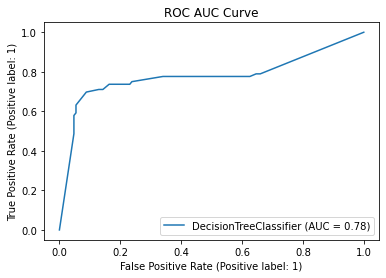

In [54]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

### Accuracy score of DecisionTreeClassifier after Tuning the model is 84% and AUC score is 78% which is pretty good

In [55]:
file = 'Titanic.pickle'
pickle.dump(dtc, open(file, 'wb'))